In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV



# 1. Import data (Portuguese_banking.csv) and get familiarized with it. (3 points)

In [78]:
df = pd.read_csv(r"C:\Users\user\Desktop\PYTHON\FINAL\Portuguese_banking (2).csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


# 2.	Show distribution of age columns. Get visual to check if outliers exist in ‘age’ column or not. (3 points)

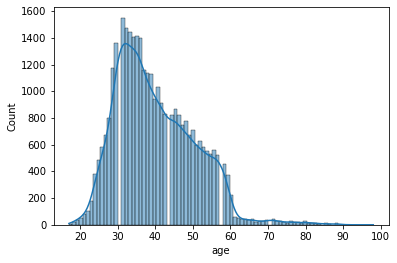

In [10]:
sns.histplot(data = df , x = "age" ,kde = True )
plt.show()

<AxesSubplot:>

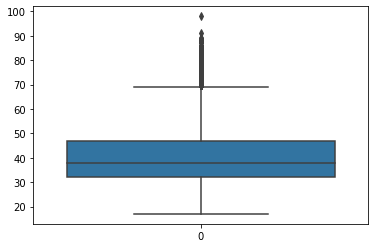

In [11]:
sns.boxplot(data=df["age"])

# 3.	Prepare data for modelling (7 points)

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [15]:
df.info

<bound method DataFrame.info of        age           job   marital            education  default housing loan  \
0       49   blue-collar   married             basic.9y  unknown      no   no   
1       37  entrepreneur   married    university.degree       no      no   no   
2       78       retired   married             basic.4y       no      no   no   
3       36        admin.   married    university.degree       no     yes   no   
4       59       retired  divorced    university.degree       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
32945   28      services    single          high.school       no     yes   no   
32946   52    technician   married  professional.course       no     yes   no   
32947   54        admin.   married             basic.9y       no      no  yes   
32948   29        admin.   married    university.degree       no      no   no   
32949   35        admin.   married    university.degree       no      no  yes

In [16]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [253]:
df.duplicated().sum()

8

In [254]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [80]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,2,0,0,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,0,0,0,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,0,0,0,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,0,1,0,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,0,0,0,cellular,jun,tue,368,2,999,0,nonexistent,no


In [84]:
for x in ["default" , "housing" , "loan"] : 
    df[x] = df[x].map({"no" : 0 , "yes" : 1 , "unknown" : 2})

In [83]:
df["y"] = df["y"].map({"no" : 0 , "yes" : 1})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,NaN,NaN,NaN,cellular,nov,wed,227,4,999,0,nonexistent,NaN
1,37,entrepreneur,married,university.degree,NaN,NaN,NaN,telephone,nov,wed,202,2,999,1,failure,NaN
2,78,retired,married,basic.4y,NaN,NaN,NaN,cellular,jul,mon,1148,1,999,0,nonexistent,NaN
3,36,admin.,married,university.degree,NaN,NaN,NaN,telephone,may,mon,120,2,999,0,nonexistent,NaN
4,59,retired,divorced,university.degree,NaN,NaN,NaN,cellular,jun,tue,368,2,999,0,nonexistent,NaN


KeyError: "['default', 'housing', 'loan', 'y'] not found in axis"

In [77]:
missing_values = df.isna()
missing_values.sum()

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown                0
contact_telephone                0
month_aug                        0
month_dec           

In [45]:
objects = df.select_dtypes(include="object").columns.to_list()

In [47]:
df = pd.get_dummies(data = df , columns = objects , drop_first=True)
df.head()

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,37,202,2,999,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,36,120,2,999,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
X = df.drop(columns = "y")
y = df["y"]

In [54]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)



In [74]:
import numpy as np

print(np.isnan(X_train).sum())
print(np.isinf(X_train).sum())

69195
0


In [75]:
X_train = X_train.dropna()
X_train = X_train[~np.isinf(X_train)]

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

# 4.	Fit data into different models- Logistic Regression. (2 points)

In [71]:
from sklearn.preprocessing import StandardScaler    


In [73]:
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [68]:
#print(X_train.isna().sum())
missing_values = X_train.isna().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [64]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


### SVM

In [62]:
model_svm = svm.SVC(kernel='poly', probability = True)
model_svm.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Naïve Bayes

In [275]:
model_nb  = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

### Decision Tree

In [276]:
model_dtree = DecisionTreeClassifier()
model_dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest

In [277]:
model_rf = RandomForestClassifier(n_estimators = 10, random_state = None)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

# 5. Print detailed reports regarding accuracy metric and confusion matrix for each model, check overfitting. (5 points)

## Raport for Logistic Regeression

In [278]:
score(model_name = model_log , X_train=X_train_scaled , X_test=X_test_scaled)
#There is no overfitting. Because, low bias and low vaiance, it is good balanced

The train score is 86.43%
Test score is 84.97%


In [279]:
metrics_func(model_name = model_log , X_test=X_test_scaled)

The roc auc score is 84.90%
The gini score is 69.79%
The f1 score is 84.15%
The accurancy score is 84.97%


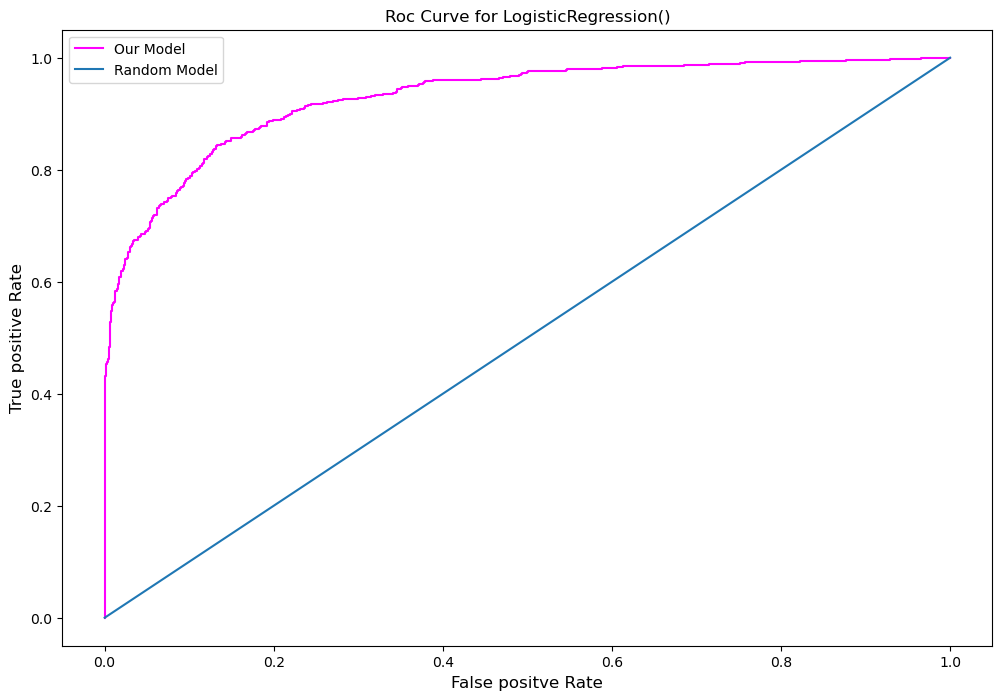

In [280]:
roc_curve_func(model_log , X_test_scaled)

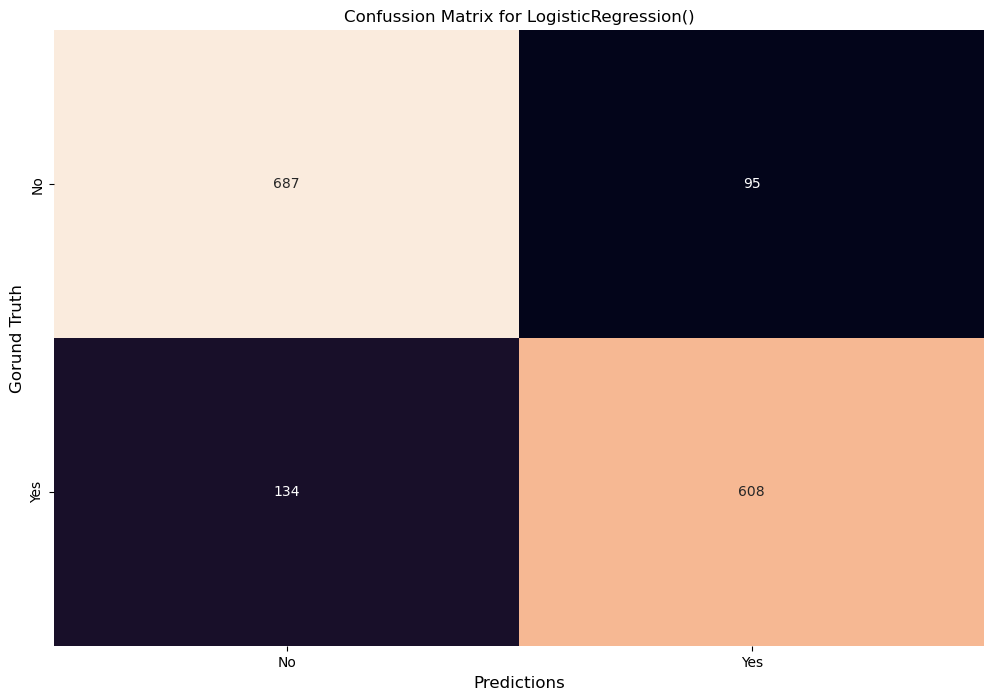

In [281]:
confussion_func(model_name = model_log , X_test=X_test_scaled)

## Raport for SVM


In [282]:
score(model_name = model_svm , X_train=X_train_scaled , X_test=X_test_scaled)
#There is underfitting. Beacause, high bias and low vaiance

The train score is 61.16%
Test score is 62.93%


In [283]:
metrics_func(model_name = model_svm , X_test=X_test_scaled)

The roc auc score is 61.93%
The gini score is 23.85%
The f1 score is 38.52%
The accurancy score is 62.93%


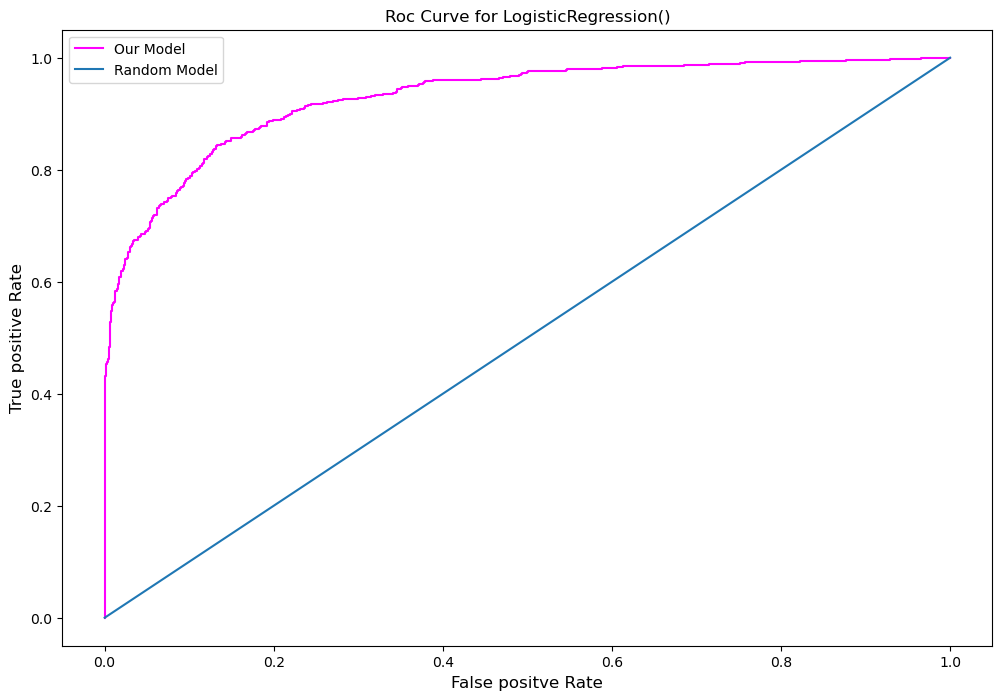

In [284]:
roc_curve_func(model_log , X_test_scaled)

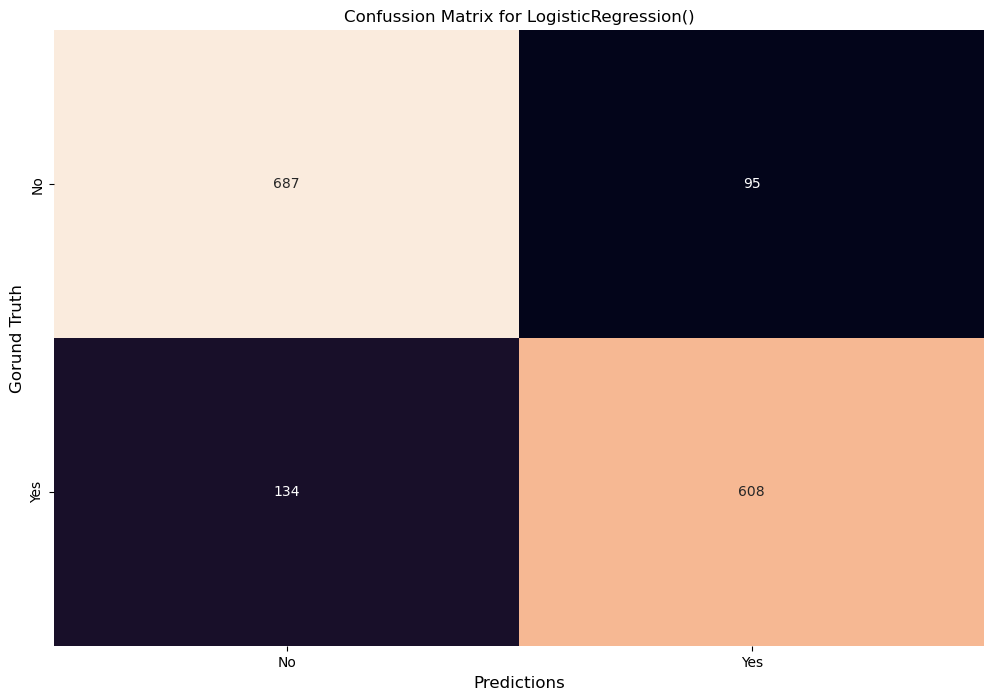

In [285]:
confussion_func(model_name = model_log , X_test=X_test_scaled)

### Raport Naïve Bayes

In [286]:
score(model_name = model_nb , X_train=X_train_scaled , X_test=X_test_scaled)
#There is underfitting. Beacause, high bias and low vaiance

The train score is 48.73%
Test score is 48.69%


In [287]:
metrics_func(model_name = model_nb  , X_test=X_test_scaled)

The roc auc score is 50.00%
The gini score is 0.00%
The f1 score is 65.49%
The accurancy score is 48.69%


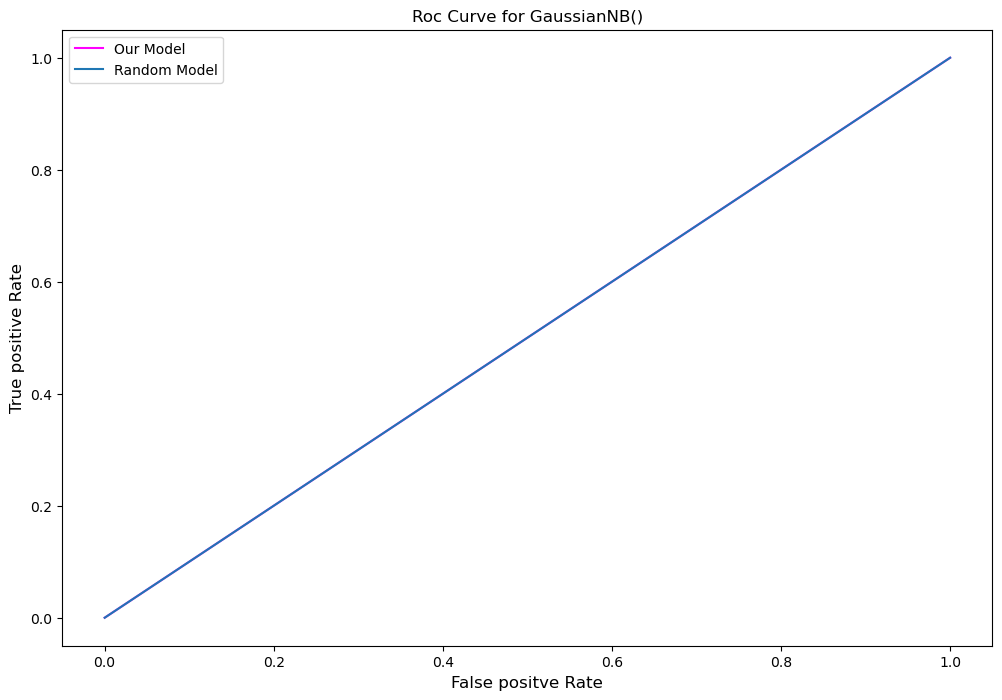

In [288]:
roc_curve_func(model_nb, X_test_scaled)

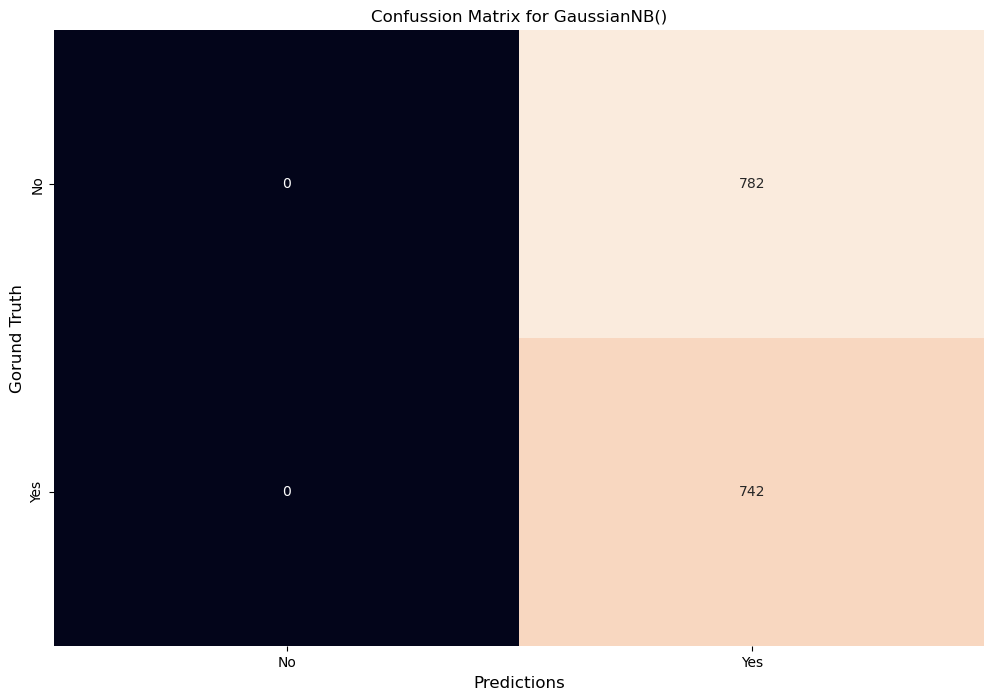

In [289]:
confussion_func(model_name = model_nb , X_test=X_test_scaled)

### Raport for Decision Tree

In [290]:
score(model_name = model_dtree , X_train=X_train_scaled , X_test=X_test_scaled)
#There is underfitting. Beacause, high bias and low vaiance

The train score is 48.73%
Test score is 48.69%


In [291]:
metrics_func(model_name = model_dtree  , X_test=X_test_scaled)

The roc auc score is 50.00%
The gini score is 0.00%
The f1 score is 65.49%
The accurancy score is 48.69%


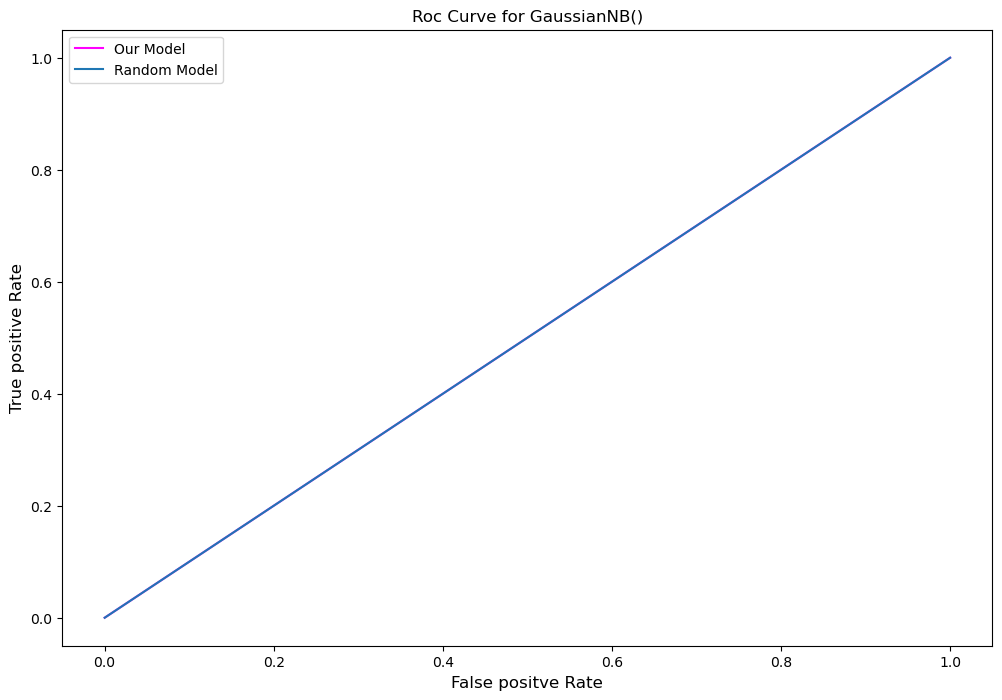

In [292]:
roc_curve_func(model_nb, X_test_scaled)

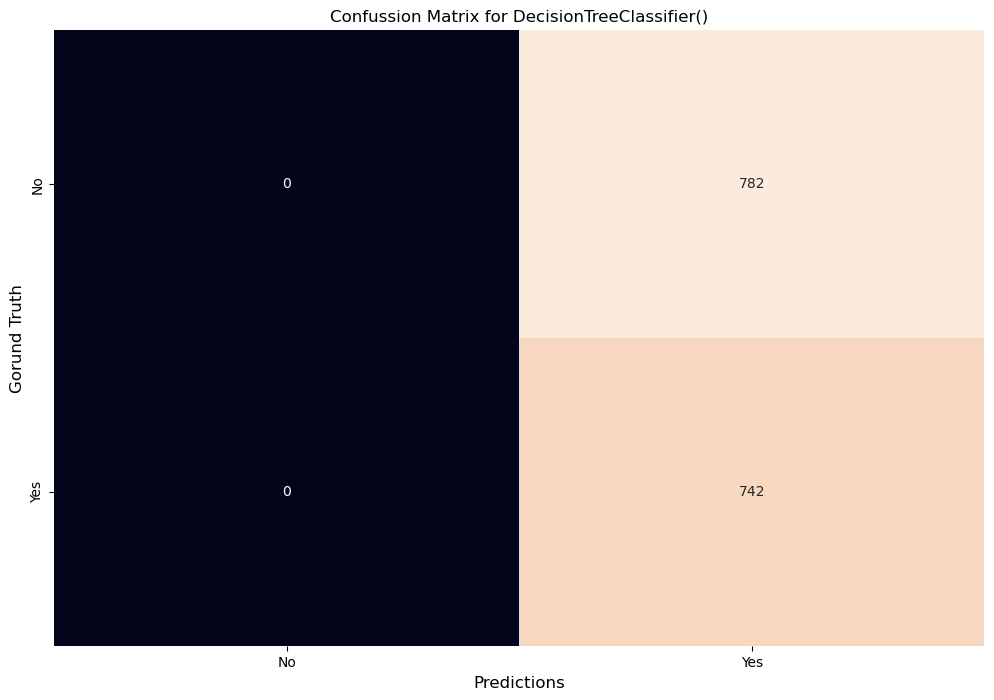

In [293]:
confussion_func(model_name = model_dtree , X_test=X_test_scaled)

## Raport for Random Forest

In [294]:
score(model_name = model_rf , X_train=X_train_scaled , X_test=X_test_scaled)
#There is underfitting. Beacause, high bias and low vaiance

The train score is 49.09%
Test score is 49.34%


In [295]:
metrics_func(model_name = model_rf   , X_test=X_test_scaled)

The roc auc score is 50.63%
The gini score is 1.26%
The f1 score is 65.72%
The accurancy score is 49.34%


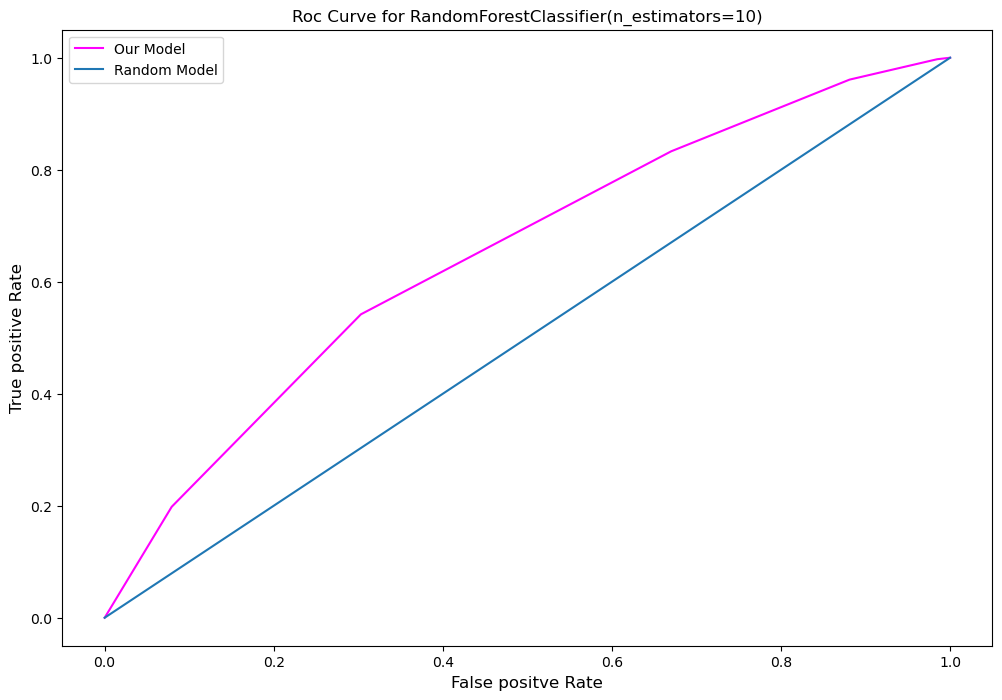

In [296]:
roc_curve_func(model_rf, X_test_scaled)

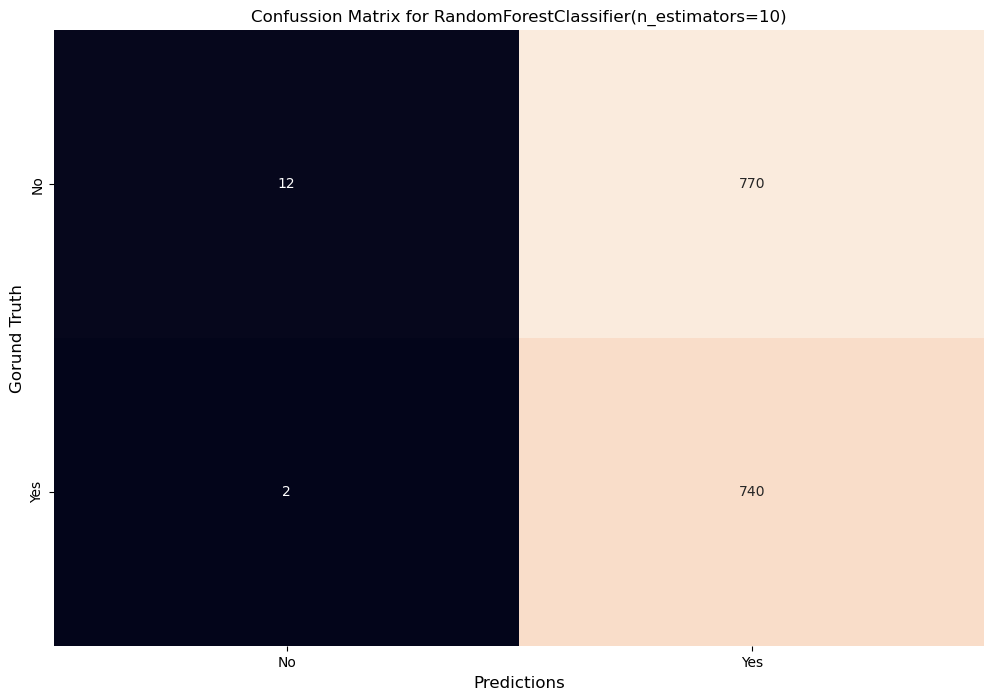

In [297]:
confussion_func(model_name = model_rf,  X_test=X_test_scaled)